# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
Iris = load_iris()
x = Iris.data
y = Iris.target

In [3]:
df_x = pd.DataFrame(x, columns=Iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,y,test_size=0.2,random_state=2022)

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [6]:
print(np.unique(y_train))

[0 1 2]


## **sepal끼리, petal끼리**

In [7]:
x_train_sepal = x_train.loc[:,['sepal length (cm)', 'sepal width (cm)']]
x_train_petal = x_train.loc[:,['petal width (cm)', 'petal width (cm)']]

x_train_sepal.head()

,sepal length (cm),sepal width (cm)
38,4.4,3.0
82,5.8,2.7
89,5.5,2.5
1,4.9,3.0
74,6.4,2.9


In [8]:
x_train_petal.head()

,petal width (cm),petal width (cm)
38,0.2,0.2
82,1.2,1.2
89,1.3,1.3
1,0.2,0.2
74,1.3,1.3


## One-hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [10]:
y_train.shape, y_test.shape

((120, 3), (30, 3))

## Modeling : multi-input & Add layer

In [11]:
# 필요 라이브러리 불러오기
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate, Add
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [12]:
x_train_petal.shape

(120, 2)

In [23]:
# 세션 클리어
clear_session()

# 모델 레이어 생성
il_1 = Input(shape=(2,),name='Input_1')
hl_1 = Dense(4,activation=relu)(il_1)

il_2 = Input(shape=(2,),name='Input_2')
hl_2 = Dense(4,activation=relu)(il_2)

add_l = Add()([hl_1,hl_2])
ol = Dense(3,activation=softmax)(add_l)

# 모델 생성
model = Model([il_1,il_2],ol)

# 모델 컴파일
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [24]:
# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 Input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['Input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['Input_2[0][0]']                
                                                                                              

## 모델 시각화

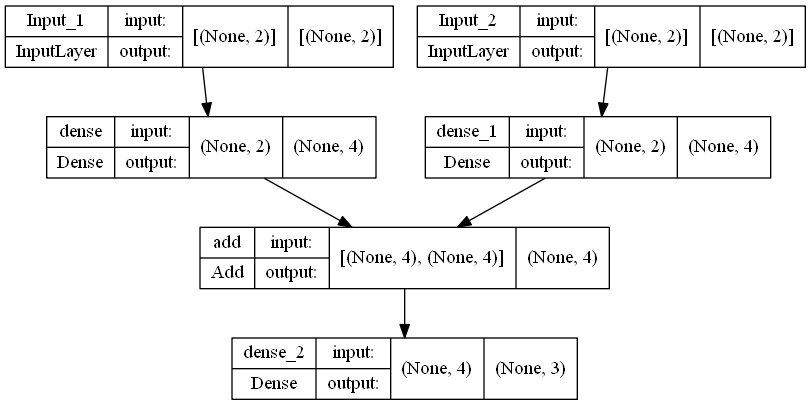

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

## 학습 시켜보기!

In [26]:
# EearlyStopping 지정
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=20, verbose=1, restore_best_weights=True)

In [27]:
# 모델 학습
model.fit([x_train_petal,x_train_sepal],y_train,epochs=1000,verbose=1,validation_split=0.1,callbacks=es)

Epoch 1/1000
4/4 [==============================] - 1s 58ms/step - loss: 5.9778 - accuracy: 0.3241 - val_loss: 5.9740 - val_accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 5.8403 - accuracy: 0.3241 - val_loss: 5.8801 - val_accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 5.7058 - accuracy: 0.3148 - val_loss: 5.7894 - val_accuracy: 0.4167
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 5.5873 - accuracy: 0.2500 - val_loss: 5.7031 - val_accuracy: 0.1667
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 5.4551 - accuracy: 0.1019 - val_loss: 5.6257 - val_accuracy: 0.0833
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 5.3428 - accuracy: 0.0370 - val_loss: 5.5502 - val_accuracy: 0.0833
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 5.2335 - accuracy: 0.0093 - val_loss: 5.4779 - val_accuracy: 0.0833
Epoch 8/1000


4/4 [==============================] - 0s 12ms/step - loss: 2.0750 - accuracy: 0.3704 - val_loss: 2.3035 - val_accuracy: 0.1667
Epoch 59/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.0275 - accuracy: 0.3704 - val_loss: 2.2515 - val_accuracy: 0.1667
Epoch 60/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.9826 - accuracy: 0.3704 - val_loss: 2.2005 - val_accuracy: 0.1667
Epoch 61/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.9358 - accuracy: 0.3704 - val_loss: 2.1510 - val_accuracy: 0.1667
Epoch 62/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.8937 - accuracy: 0.3704 - val_loss: 2.1006 - val_accuracy: 0.1667
Epoch 63/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.8471 - accuracy: 0.3704 - val_loss: 2.0516 - val_accuracy: 0.1667
Epoch 64/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.8045 - accuracy: 0.3704 - val_loss: 2.0017 - val_accuracy: 0.1667
Epoch 65/1000
4/4 [=

Epoch 116/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8002 - accuracy: 0.8241 - val_loss: 0.7954 - val_accuracy: 0.7500
Epoch 117/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.7965 - accuracy: 0.8426 - val_loss: 0.7901 - val_accuracy: 0.7500
Epoch 118/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.7931 - accuracy: 0.8519 - val_loss: 0.7853 - val_accuracy: 0.7500
Epoch 119/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7897 - accuracy: 0.8519 - val_loss: 0.7809 - val_accuracy: 0.7500
Epoch 120/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7866 - accuracy: 0.8426 - val_loss: 0.7783 - val_accuracy: 0.7500
Epoch 121/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7831 - accuracy: 0.8611 - val_loss: 0.7736 - val_accuracy: 0.7500
Epoch 122/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7801 - accuracy: 0.8519 - val_loss: 0.7683 - val_accuracy: 0.7500

4/4 [==============================] - 0s 10ms/step - loss: 0.6681 - accuracy: 0.8704 - val_loss: 0.6210 - val_accuracy: 0.8333
Epoch 174/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6663 - accuracy: 0.8796 - val_loss: 0.6207 - val_accuracy: 0.8333
Epoch 175/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6645 - accuracy: 0.8796 - val_loss: 0.6197 - val_accuracy: 0.8333
Epoch 176/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6628 - accuracy: 0.8889 - val_loss: 0.6196 - val_accuracy: 0.8333
Epoch 177/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6611 - accuracy: 0.8889 - val_loss: 0.6189 - val_accuracy: 0.8333
Epoch 178/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6595 - accuracy: 0.8981 - val_loss: 0.6174 - val_accuracy: 0.8333
Epoch 179/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6578 - accuracy: 0.9074 - val_loss: 0.6157 - val_accuracy: 0.8333
Epoch 180/1000


4/4 [==============================] - 0s 12ms/step - loss: 0.5794 - accuracy: 0.9074 - val_loss: 0.5247 - val_accuracy: 0.9167
Epoch 231/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5778 - accuracy: 0.9074 - val_loss: 0.5220 - val_accuracy: 0.8333
Epoch 232/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5764 - accuracy: 0.9074 - val_loss: 0.5192 - val_accuracy: 0.8333
Epoch 233/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5752 - accuracy: 0.9074 - val_loss: 0.5170 - val_accuracy: 0.8333
Epoch 234/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5738 - accuracy: 0.9074 - val_loss: 0.5157 - val_accuracy: 0.8333
Epoch 235/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5724 - accuracy: 0.9074 - val_loss: 0.5142 - val_accuracy: 0.8333
Epoch 236/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5710 - accuracy: 0.9074 - val_loss: 0.5133 - val_accuracy: 0.8333
Epoch 237/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.5089 - accuracy: 0.9259 - val_loss: 0.4421 - val_accuracy: 0.9167
Epoch 288/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5076 - accuracy: 0.9259 - val_loss: 0.4418 - val_accuracy: 0.9167
Epoch 289/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5064 - accuracy: 0.9167 - val_loss: 0.4430 - val_accuracy: 0.9167
Epoch 290/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5053 - accuracy: 0.9074 - val_loss: 0.4434 - val_accuracy: 0.9167
Epoch 291/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5040 - accuracy: 0.9074 - val_loss: 0.4423 - val_accuracy: 0.9167
Epoch 292/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5030 - accuracy: 0.9074 - val_loss: 0.4417 - val_accuracy: 0.9167
Epoch 293/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5019 - accuracy: 0.9074 - val_loss: 0.4412 - val_accuracy: 0.9167
Epoch 294/1000
4

4/4 [==============================] - 0s 10ms/step - loss: 0.4516 - accuracy: 0.9074 - val_loss: 0.3930 - val_accuracy: 0.9167
Epoch 345/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4507 - accuracy: 0.9074 - val_loss: 0.3938 - val_accuracy: 0.9167
Epoch 346/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4497 - accuracy: 0.9074 - val_loss: 0.3948 - val_accuracy: 0.9167
Epoch 347/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4489 - accuracy: 0.9074 - val_loss: 0.3946 - val_accuracy: 0.9167
Epoch 348/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4480 - accuracy: 0.9167 - val_loss: 0.3937 - val_accuracy: 0.9167
Epoch 349/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4470 - accuracy: 0.9167 - val_loss: 0.3934 - val_accuracy: 0.9167
Epoch 350/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4462 - accuracy: 0.9167 - val_loss: 0.3935 - val_accuracy: 0.9167
Epoch 351/1000


4/4 [==============================] - 0s 10ms/step - loss: 0.4046 - accuracy: 0.9259 - val_loss: 0.3508 - val_accuracy: 0.9167
Epoch 402/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4038 - accuracy: 0.9259 - val_loss: 0.3506 - val_accuracy: 0.9167
Epoch 403/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4032 - accuracy: 0.9167 - val_loss: 0.3525 - val_accuracy: 0.9167
Epoch 404/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4022 - accuracy: 0.9259 - val_loss: 0.3531 - val_accuracy: 0.9167
Epoch 405/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4014 - accuracy: 0.9352 - val_loss: 0.3543 - val_accuracy: 0.9167
Epoch 406/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4011 - accuracy: 0.9352 - val_loss: 0.3564 - val_accuracy: 0.9167
Epoch 407/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4003 - accuracy: 0.9444 - val_loss: 0.3565 - val_accuracy: 0.9167
Epoch 408/1000


4/4 [==============================] - 0s 10ms/step - loss: 0.3641 - accuracy: 0.9444 - val_loss: 0.3252 - val_accuracy: 0.9167
Epoch 459/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3635 - accuracy: 0.9444 - val_loss: 0.3225 - val_accuracy: 0.9167
Epoch 460/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3626 - accuracy: 0.9444 - val_loss: 0.3206 - val_accuracy: 0.9167
Epoch 461/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3618 - accuracy: 0.9444 - val_loss: 0.3191 - val_accuracy: 0.9167
Epoch 462/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3612 - accuracy: 0.9444 - val_loss: 0.3162 - val_accuracy: 0.9167
Epoch 463/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3605 - accuracy: 0.9352 - val_loss: 0.3139 - val_accuracy: 0.9167
Epoch 464/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3599 - accuracy: 0.9352 - val_loss: 0.3123 - val_accuracy: 0.9167
Epoch 465/1000

4/4 [==============================] - 0s 10ms/step - loss: 0.3284 - accuracy: 0.9444 - val_loss: 0.2855 - val_accuracy: 0.9167
Epoch 516/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3280 - accuracy: 0.9444 - val_loss: 0.2839 - val_accuracy: 0.9167
Epoch 517/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3276 - accuracy: 0.9444 - val_loss: 0.2831 - val_accuracy: 0.9167
Epoch 518/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3270 - accuracy: 0.9444 - val_loss: 0.2814 - val_accuracy: 0.9167
Epoch 519/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3266 - accuracy: 0.9444 - val_loss: 0.2811 - val_accuracy: 0.9167
Epoch 520/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3259 - accuracy: 0.9444 - val_loss: 0.2802 - val_accuracy: 0.9167
Epoch 521/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3254 - accuracy: 0.9444 - val_loss: 0.2800 - val_accuracy: 0.9167
Epoch 522/1000

4/4 [==============================] - 0s 10ms/step - loss: 0.2974 - accuracy: 0.9537 - val_loss: 0.2676 - val_accuracy: 0.9167
Epoch 573/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2967 - accuracy: 0.9537 - val_loss: 0.2673 - val_accuracy: 0.9167
Epoch 574/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2962 - accuracy: 0.9537 - val_loss: 0.2675 - val_accuracy: 0.9167
Epoch 575/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2957 - accuracy: 0.9537 - val_loss: 0.2684 - val_accuracy: 0.9167
Epoch 576/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2953 - accuracy: 0.9537 - val_loss: 0.2681 - val_accuracy: 0.9167
Epoch 577/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2949 - accuracy: 0.9537 - val_loss: 0.2668 - val_accuracy: 0.9167
Epoch 577: early stopping


In [28]:
# 모델 예측
x_test_sepal = x_test.loc[:,['sepal length (cm)', 'sepal width (cm)']]
x_test_petal = x_test.loc[:,['petal width (cm)', 'petal width (cm)']]
y_pred = model.predict([x_test_petal,x_test_sepal])

In [29]:
# 결과 평가
model.evaluate([x_test_petal,x_test_sepal],y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.3363 - accuracy: 0.9000


[0.33626309037208557, 0.8999999761581421]

In [30]:
print(y_test[:5])
print(y_pred[:5])

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[7.4977666e-04 1.9886127e-01 8.0038899e-01]
 [1.4441116e-03 3.6427224e-01 6.3428366e-01]
 [9.2100787e-01 7.7100441e-02 1.8916569e-03]
 [6.4940341e-03 4.1896859e-01 5.7453740e-01]
 [9.1916031e-01 7.8937046e-02 1.9025974e-03]]


In [31]:
y_pred[0]

array([7.4977666e-04, 1.9886127e-01, 8.0038899e-01], dtype=float32)

In [32]:
predlist = np.argmax(y_pred, axis=1)
print(len(predlist))

30
